In [1]:
# 
https://www.kaggle.com/code/thasnihakeem/walmart-recruiting-store-sales-forecasting-predict#walmart-recruiting-store-sales-forecasting-predictions

In [ ]:
https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
stores = pd.read_csv("C:\BALAKUMAR\LocalFiles\Data Science program\stores.csv")


In [3]:
train = pd.read_csv("C:\\BALAKUMAR\\LocalFiles\\Data Science program\\train.csv")


In [4]:
test = pd.read_csv("C:\\BALAKUMAR\\LocalFiles\\Data Science program\\test.csv")

In [5]:
features = pd.read_csv("C:\\BALAKUMAR\\LocalFiles\\Data Science program\\features.csv")


In [6]:
features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [7]:
stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [8]:
test.head(10)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
5,1,1,2012-12-07,False
6,1,1,2012-12-14,False
7,1,1,2012-12-21,False
8,1,1,2012-12-28,True
9,1,1,2013-01-04,False


In [9]:
train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [10]:
#find the number of rows in the dataset
features.shape , train.shape , stores.shape , test.shape

((8190, 12), (421570, 5), (45, 3), (115064, 4))

In [11]:
print(features.dtypes)
print("------------------------------------------------------------\n")
print(train.dtypes)
print("------------------------------------------------------------\n")
print(stores.dtypes)
print("------------------------------------------------------------\n")
print(test.dtypes)

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
------------------------------------------------------------

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object
------------------------------------------------------------

Store     int64
Type     object
Size      int64
dtype: object
------------------------------------------------------------

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object


In [12]:
#Data cleansing

feature_store = features.merge(stores, how='inner', on = "Store")
feature_store.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False,A,151315
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False,A,151315
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False,A,151315
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False,A,151315


In [13]:
train = train.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])
train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [14]:
test = test.merge(feature_store, how='inner', on=['Store','Date','IsHoliday'])

In [15]:
train = train.copy()
test = test.copy()

In [16]:
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Week'] = pd.to_datetime(train['Date']).dt.isocalendar().week
train['Day'] = pd.to_datetime(train['Date']).dt.day
train.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [17]:
train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5


In [18]:
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Week'] = pd.to_datetime(test['Date']).dt.isocalendar().week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [19]:
train.Year.unique()

array([2010, 2011, 2012], dtype=int64)

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


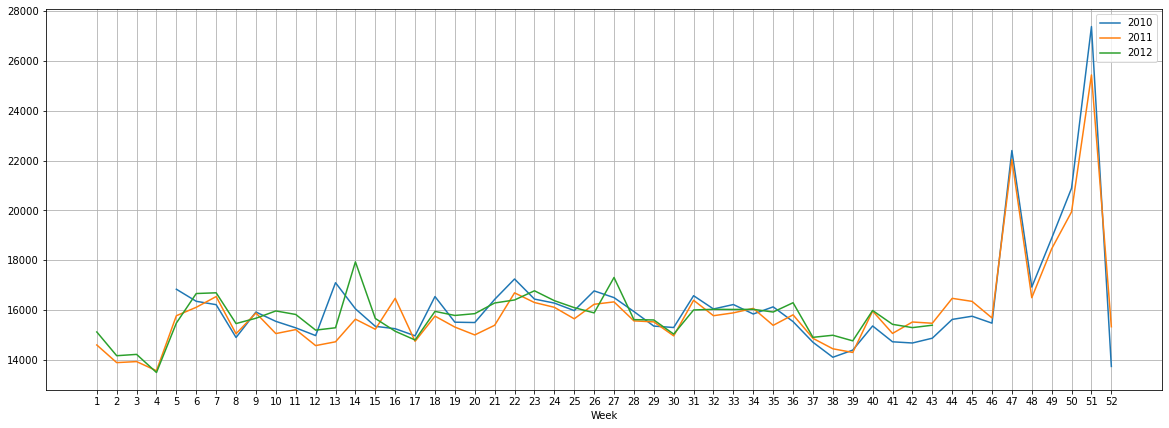

In [21]:
weekly_sales = train.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = train.loc[train['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = train.loc[train['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = train.loc[train['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()


In [22]:
weekly_sales2010.head(10)

Weekly_Sales          
              mean    median
Week                        
5     16836.121997  7904.690
6     16352.056032  8365.095
7     16216.658979  8411.250
8     14899.549688  7235.800
9     15921.015727  7717.975
10    15546.850545  7529.550
11    15286.773578  7915.600
12    14975.894486  7345.130
13    17098.620298  8658.890
14    16050.589780  8006.270

In [23]:
Y_train = train['Weekly_Sales']


In [24]:
targets = Y_train.copy()


In [25]:
train= train.drop(['Weekly_Sales'],axis=1)


In [26]:
train.head(10)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
1,1,2,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
2,1,3,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
3,1,4,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
4,1,5,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
5,1,6,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
6,1,7,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
7,1,8,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
8,1,9,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
9,1,10,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5


In [27]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                     int64
Size                     int64
Year                     int64
Month                    int64
Week                    UInt32
Day                      int64
dtype: object

In [28]:
#identify numerical and categorical columns 

numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train.select_dtypes('object').columns.tolist()

In [29]:
print(numeric_cols)
print("-----------------------")
print(categorical_cols)

['Store', 'Dept', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'Day']
-----------------------
[]


In [30]:
#train (check if there are any nulls)

train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

In [31]:
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
Year                0
Month               0
Week                0
Day                 0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer


In [33]:
#impute numerical data

imputer = SimpleImputer(missing_values= np.NaN, strategy='mean')


In [34]:
imputer.fit(train[numeric_cols])


SimpleImputer()

In [35]:
train[numeric_cols] =imputer.transform(train[numeric_cols])


In [36]:
train.isnull().sum()


Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

In [37]:
#Evaluate the algorithm

In [40]:
# 'Date' is irrelevant and Drop it from data.
train= train.drop(['Date'],axis=1)
test = test.drop(['Date'], axis=1)

In [41]:
# Preparing the dataset:
X_train =train[['Store','Dept','IsHoliday','Size','Week','Type','Year']]
X_test = test[['Store', 'Dept','IsHoliday', 'Size', 'Week', 'Type', 'Year']]

In [42]:
print(X_train.columns)
print(X_test.columns)

Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year'], dtype='object')
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year'], dtype='object')


In [44]:
from sklearn.model_selection import train_test_split


In [45]:
# Splitting and training
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression


In [46]:
# fitting the model
lr=LinearRegression()
lr.fit(train_inputs,train_targets)

LinearRegression()

In [47]:
Y_pred=lr.predict(train_inputs)
Y_pred

array([10511.43062391, 15878.69963478, 22838.38990493, ...,
       26901.8366241 , 12732.32849333, 20548.72973756])

In [51]:
from sklearn.metrics import mean_squared_error


In [52]:
# calculating mean_squared_error
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [53]:
#Evaluation 

rmse(train_targets,Y_pred)


21674.949850452453